# INTODUCTION TO AI HOUSE PRICE PREDICTION
You are provided with a publicly available dataset on housing, which includes various features such as property size, number of bedrooms, location, rental price, occupancy rate, and socioeconomic factors affecting housing affordability. Your task is to apply  Regression Machine Learning techniques to analyze and predict housing prices. 20 marks

Dataset: Public Housing Dataset (can be sourced from Kaggle, UCI ML Repository, or other open sources).

In [2]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualization

from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Data preprocessing
from sklearn.compose import ColumnTransformer  # Feature transformations
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Advanced regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation

In [4]:


# Use raw string (r"") or double backslashes for Windows file paths
file_path = r"C:\ai\Housing.csv"  

# Read the CSV file instead of XML
df = pd.read_csv(file_path)

# Identify categorical columns dynamically
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the first few rows to verify
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [8]:
# Convert categorical variables to numerical using One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define Features (X) and Target (y)
X = df.drop(columns=["price"])  # Independent variables
y = df["price"]  # Target variable

# Scale numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print sample predictions
print(y_pred[:5])

[5344780.   7287070.   3754878.75 4502120.   3748885.  ]


In [9]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared Score: {r2}")

Mean Absolute Error: 1017470.6224770641
Mean Squared Error: 1959406221695.9854
Root Mean Squared Error: 1399787.9202564885
R-Squared Score: 0.6123495913214113


                            Feature  Importance
0                              area    0.468430
2                         bathrooms    0.151483
9               airconditioning_yes    0.062672
4                           parking    0.057455
3                           stories    0.057133
1                          bedrooms    0.048413
12     furnishingstatus_unfurnished    0.035011
7                      basement_yes    0.030823
10                     prefarea_yes    0.030689
8               hotwaterheating_yes    0.017226
6                     guestroom_yes    0.016724
11  furnishingstatus_semi-furnished    0.013692
5                      mainroad_yes    0.010250


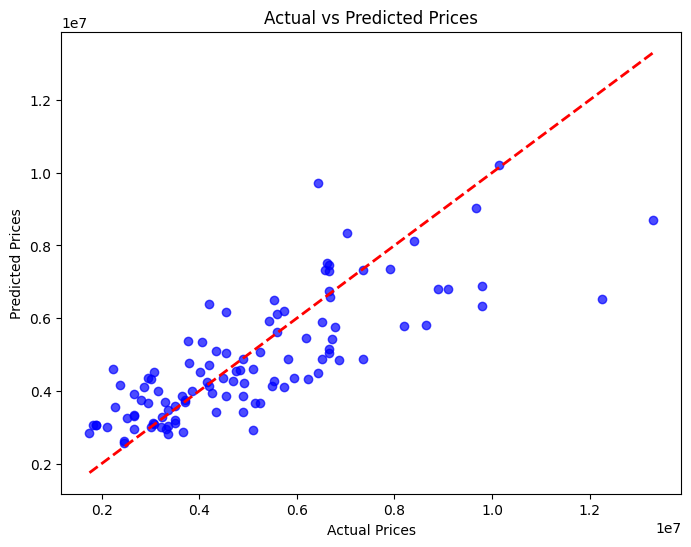

In [10]:
# Feature importance for RandomForestRegressor
if isinstance(model, RandomForestRegressor):
    feature_importance = model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    print(importance_df)

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [12]:

# Copy an existing row to maintain structure
example_house = X.iloc[0].copy()

# Assign random values from dataset to ensure realistic input
example_house[:] = np.random.choice(X.values.flatten(), size=len(example_house))

# Convert to DataFrame to maintain column names
example_house_df = pd.DataFrame([example_house], columns=X.columns)

# Scale numeric values properly
example_house_df[numeric_columns] = scaler.transform(example_house_df[numeric_columns])

# Predict price
predicted_price = model.predict(example_house_df)

print(f"Predicted House Price: {predicted_price[0]}")


Predicted House Price: 3319950.666666666
